# **Representacion en el Aprendizaje**

## Curvas de aprendizaje
Es un gráfico de diagnóstico útil que representa el
comportamiento de su algoritmo de aprendizaje automático (su hipótesis)
con respecto a la cantidad disponible de observaciones. La idea es comparar
cómo se comporta el rendimiento del entrenamiento (el error o la precisión
de los casos dentro de la muestra) con respecto a la validación cruzada
(normalmente diez veces) utilizando diferentes tamaños dentro de la
muestra.

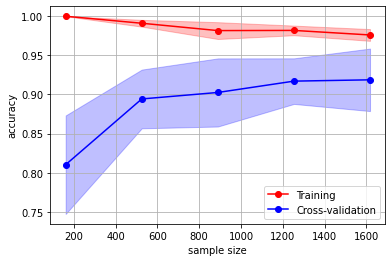

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
digits = load_digits()
X, y = digits.data, digits.target

hypothesis = SGDClassifier(loss='log', shuffle=True, penalty='l2',
                           alpha=0.0001, random_state=3)


# la 1er matriz contendrá los tamaños efectivos de entrenamiento, la 2da  las puntuaciones
# de entrenamiento obtenidas en cada iteración de CV y la 3era las puntuaciones de VC.
train_size, train_scores, test_scores = learning_curve(
    hypothesis, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10,
    scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)

mean_train = np.mean(train_scores, axis=1)

# clip es para limitar los valores dentro del arreglo(en este caso entre 0 y 1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)

mean_test = np.mean(test_scores, axis=1)

# clip es para limitar los valores dentro del arreglo(en este caso entre 0 y 1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)

plt.plot(train_size, mean_train, 'ro-', label='Training')
plt.fill_between(train_size, upper_train,
                 lower_train, alpha=0.25, color='r')
plt.plot(train_size, mean_test, 'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test,
                 alpha=0.25, color='b')
plt.grid()
plt.xlabel('sample size')  # adds label to x axis
plt.ylabel('accuracy')  # adds label to y axis
plt.legend(loc='lower right', numpoints=1)
plt.show()


## Curvas de validación
Al igual que las curvas de aprendizaje operan con diferentes tamaños de
muestra, las curvas de validación estiman el rendimiento del
entrenamiento y la validación cruzada con respecto a los valores que
puede tomar un hiperparámetro. Al igual que en las curvas de aprendizaje,
pueden aplicarse consideraciones similares, aunque esta visualización en
particular le proporcionará más información sobre el comportamiento de
optimización de su parámetro, sugiriéndole visualmente la parte del
espacio de hiperparámetros en la que debe concentrar su búsqueda

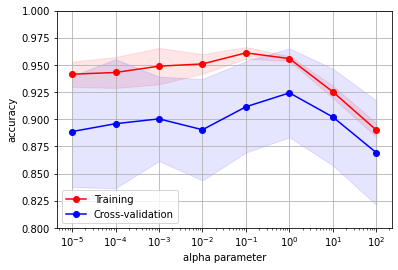

In [29]:
from sklearn.model_selection import validation_curve
testing_range = np.logspace(-5, 2, 8)

hypothesis = SGDClassifier(loss='log', shuffle=True, max_iter=5, penalty='l2',
                           alpha=0.0001, random_state=3)
                           
train_scores, test_scores = validation_curve(hypothesis, X, y,
                                             param_name='alpha',
                                             param_range=testing_range,
                                             cv=10, scoring='accuracy', n_jobs=-1)
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)


# semilogx es igual al plot pero devuelve el eje x en forma de logaritmo 
plt.semilogx(testing_range, mean_train, 'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train,
                 alpha=0.1, color='r')
                 

# semilogx es igual al plot pero devuelve el eje x en forma de logaritmo 
plt.semilogx(testing_range, mean_test, 'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test,
                 alpha=0.1, color='b')
plt.grid()
plt.xlabel('alpha parameter')  # adds label to x axis
plt.ylabel('accuracy')  # adds label to y axis
plt.ylim(0.8, 1.0)
plt.legend(loc='lower left', numpoints=1)
plt.show()


## Feature importance for RandomForests

In [38]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target
feature_names = np.array([' '.join([str(b), a]) for a, b in
                          zip(boston.feature_names, range(
                              len(boston.feature_names)))])

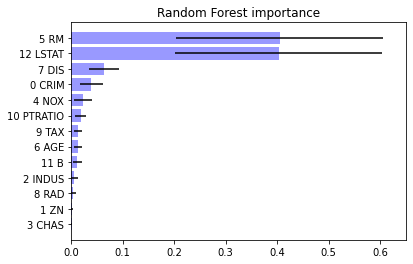

In [56]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100,  random_state=101).fit(X, y)

importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)

indices = np.argsort(importance)
range_ = range(len(importance))

plt.figure()
plt.title("Random Forest importance")
plt.barh(range_,importance[indices],color="b", xerr=std[indices], alpha=0.4, align="center")
plt.yticks(range(len(importance)), feature_names[indices])

plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()


## Creating a prediction server with machine-learning-as-a-service
Un servicio sobre **HTTP** que haga predicciones como servicio, o genéricamente, cualquier  **machine-learning-as-a-service(ML-AAS)** resuelve probelmas sobre un modelo como : 
* Está codificando en un lenguaje de programación que no es Python (Java, Scala, C, C++, etc.) y necesita llamar al predictor que ha desarrollado en Python
* Se trabaja con big data y el modelo se entrena en la misma ubicación remota en la que se almacenan los datos.
